## Задание 1

### 1) Подготовка рабочей среды и импорт библиотек

Инициализируем рабочую среду Google Colab и подключаем необходимые библиотеки для работы с нейронными сетями и обработки данных.

In [1]:
# Подключение необходимых библиотек и модулей
import os


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

2025-12-07 19:27:47.288122: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2) Загрузка датасета MNIST

Загружаем стандартный набор данных MNIST, который содержит изображения рукописных цифр от 0 до 9 с соответствующими метками.

In [2]:
# Импорт и загрузка датасета MNIST
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 3) Разделение данных на обучающую и тестовую выборки

Производим собственное разбиение датасета в соотношении 60 000:10 000. Для воспроизводимости результатов используем параметр random_state = 3 (вычисляется как 4k - 1, где k = 1 - номер нашей бригады).

In [3]:
# Создание собственного разбиения датасета
from sklearn.model_selection import train_test_split

# Объединение исходных обучающей и тестовой выборок в единый набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Разделение на обучающую и тестовую выборки согласно заданию
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 3)
# Вывод размерностей полученных массивов
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


### 4) Предобработка данных

Выполняем нормализацию пикселей изображений (приведение к диапазону [0, 1]) и преобразование меток в формат one-hot encoding для корректной работы с категориальной функцией потерь.

In [4]:
# Определение параметров данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Нормализация значений пикселей: приведение к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# Преобразование меток в формат one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


### 5) Построение и обучение сверточной нейронной сети

Создаем архитектуру сверточной нейронной сети с использованием сверточных слоев, пулинга и регуляризации. Обучаем модель на подготовленных данных с выделением части данных для валидации.

In [5]:
# Создание модели сверточной нейронной сети
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Компиляция и обучение модели
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.7694 - loss: 0.7610 - val_accuracy: 0.9437 - val_loss: 0.2013
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 17s 161ms/step - accuracy: 0.9426 - loss: 0.1908 - val_accuracy: 0.9685 - val_loss: 0.1134
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - accuracy: 0.9609 - loss: 0.1283 - val_accuracy: 0.9747 - val_loss: 0.0851
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 210ms/step - accuracy: 0.9688 - loss: 0.1022 - val_accuracy: 0.9785 - val_loss: 0.0708
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - accuracy: 0.9730 - loss: 0.0871 - val_accuracy: 0.9808 - val_loss: 0.0602
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.9758 - loss: 0.0779 - val_accuracy: 0.9823 - val_loss: 0.0547
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 22s 206ms/step - accuracy: 0.9781 - loss: 0.0707 - val_accuracy: 0.9820 - val_loss: 0.0515
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.9805 - loss: 0

### 6) Оценка качества модели на тестовых данных

Проводим финальную оценку обученной модели на независимой тестовой выборке, получая значения функции потерь и точности классификации.

In [7]:
# Оценка качества работы обученной модели на тестовой выборке
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0409
Loss on test data: 0.04092026501893997
Accuracy on test data: 0.9883999824523926


### 7) Демонстрация работы модели на отдельных примерах

Визуализируем результаты распознавания для двух тестовых изображений, сравнивая предсказания модели с истинными метками.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
NN output: [[1.8653100e-06 8.5978480e-10 4.9378517e-08 3.8702552e-11 2.3658897e-05
  1.0921732e-09 9.9997437e-01 5.6489594e-11 7.1016423e-08 2.4439044e-09]]


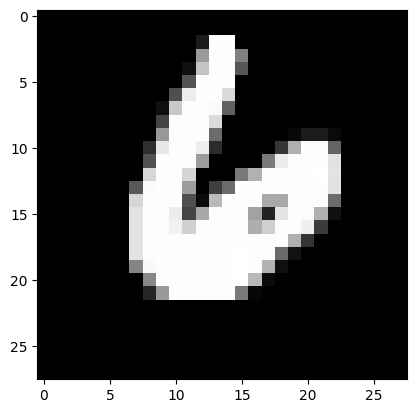

Real mark:  6
NN answer:  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
NN output: [[7.1973699e-12 5.2415072e-09 2.9768824e-08 9.9999547e-01 8.1457769e-14
  2.3912532e-08 1.0659815e-14 1.0085358e-09 6.9545116e-09 4.5778688e-06]]


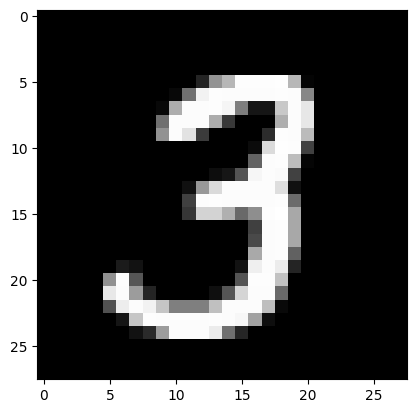

Real mark:  3
NN answer:  3


In [8]:
# Визуализация результатов распознавания для двух тестовых изображений

for n in [3,26]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 8) Детальный анализ качества классификации

Генерируем подробный отчет о качестве классификации и строим матрицу ошибок для визуального анализа работы модели по каждому классу.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1001
           1       0.99      1.00      0.99      1143
           2       0.99      0.99      0.99       987
           3       0.99      0.99      0.99      1023
           4       0.99      0.99      0.99       974
           5       1.00      0.98      0.99       907
           6       0.99      0.99      0.99       974
           7       0.98      0.99      0.99      1032
           8       0.98      0.98      0.98      1006
           9       0.98      0.99      0.98       953

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



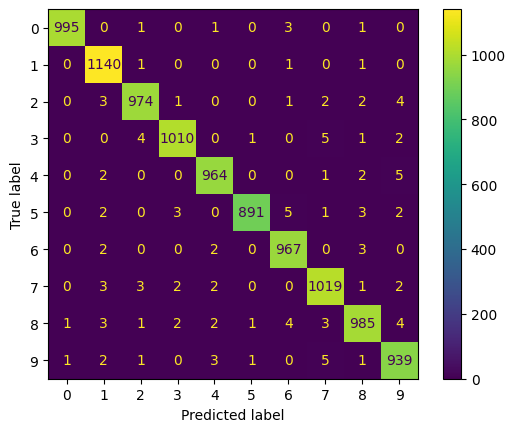

In [9]:
# Получение истинных и предсказанных меток для всех тестовых данных
true_labels = np.argmax(y_test, axis=1)

predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Вывод подробного отчета о качестве классификации
print(classification_report(true_labels, predicted_labels))
# Построение и визуализация матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)

display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()

### 9) Тестирование на собственных изображениях

Загружаем и обрабатываем собственные изображения цифр, созданные ранее, и проверяем способность модели их корректно распознавать.

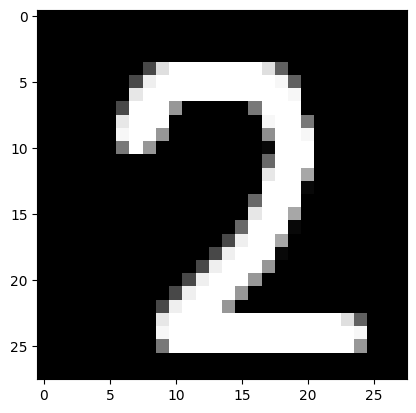

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
I think it's 2


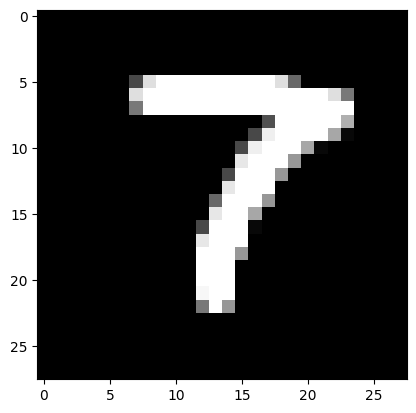

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
I think it's 7


In [10]:
# Загрузка и обработка собственных изображений
from PIL import Image

for name_image in ['2.png', '7.png']:
  file_data = Image.open(name_image)
  file_data = file_data.convert('L') # перевод в градации серого
  test_img = np.array(file_data)

  # вывод собственного изображения
  plt.imshow(test_img, cmap=plt.get_cmap('gray'))
  plt.show()

  # предобработка
  test_img = test_img / 255
  test_img = np.reshape(test_img, (1,28,28,1))

  # распознавание
  result = model.predict(test_img)
  print('I think it\'s', np.argmax(result))

### 10) Сравнение с моделью из предыдущей лабораторной работы

Загружаем сохраненную полносвязную нейронную сеть из лабораторной работы №1 и оцениваем ее производительность на тех же тестовых данных для последующего сравнения.

In [11]:
model_lr1 = keras.models.load_model("best_mnist_model.keras")

model_lr1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
# Подготовка данных для полносвязной сети (преобразование изображений в векторы)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 3)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X train:', X_test.shape)

# Преобразование меток в формат one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 784)
Shape of transformed X train: (10000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [13]:
# Оценка качества работы обученной модели на тестовой выборке
scores = model_lr1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

 34/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9142 - loss: 0.2983    

I0000 00:00:1765125204.514834  271959 service.cc:145] XLA service 0x7f89bb2d4be0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765125204.514897  271959 service.cc:153]   StreamExecutor device (0): Host, Default Version
2025-12-07 19:33:24.515300: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-07 19:33:24.542060: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1765125204.640642  271959 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9233 - loss: 0.2863
Loss on test data: 0.28625616431236267
Accuracy on test data: 0.92330002784729


### 11) Сравнительный анализ моделей

Сравниваем сверточную нейронную сеть с полносвязной сетью по ключевым показателям: количеству параметров, времени обучения и качеству классификации.

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Сверточная | 34 826                              | 15                        | accuracy: 0.988; loss: 0.041                                   |
| Полносвязная | 7 852                              | 50                        | accuracy: 0.923; loss: 0.286                                  |


**Выводы:**

На основе проведенного анализа можно заключить, что сверточная нейронная сеть демонстрирует существенные преимущества перед полносвязной сетью при решении задач распознавания изображений:

1. **Эффективность параметров**: Сверточная сеть имеет больше параметров (34 826 против 7 852), но при этом показывает значительно лучшие результаты, что говорит о более эффективном использовании параметров для извлечения пространственных признаков.

2. **Скорость обучения**: Для достижения высокого качества сверточной сети требуется в 3.3 раза меньше эпох обучения (15 против 50), что существенно сокращает время обучения.

3. **Точность классификации**: Сверточная сеть показывает более высокую точность (98.8% против 92.3%) и значительно меньшую функцию потерь (0.041 против 0.286). Разница в точности составляет 6.5%, что является существенным улучшением.

4. **Обобщающая способность**: Сверточная сеть демонстрирует лучшую способность к обобщению, что видно из более низкой функции потерь на тестовых данных.

Эти результаты подтверждают, что архитектура сверточных сетей, учитывающая пространственную структуру изображений через операции свертки и пулинга, является более подходящим выбором для задач компьютерного зрения, несмотря на большее количество параметров.

## Задание 2

### В новом блокноте выполнили п. 2–8 задания 1, изменив набор данных MNIST на CIFAR-10, содержащий размеченные цветные изображения объектов, разделенные на 10 классов.  
### При этом:
### - в п. 3 разбиение данных на обучающие и тестовые произвели в соотношении 50 000:10 000
### - после разбиения данных (между п. 3 и 4) вывели 25 изображений из обучающей выборки с подписями классов
### - в п. 7 одно из тестовых изображений должно распознаваться корректно, а другое – ошибочно.   

### 1) Загрузка датасета CIFAR-10

Загружаем набор данных CIFAR-10, который содержит цветные изображения размером 32x32 пикселя, разделенные на 10 классов: самолет, автомобиль, птица, кошка, олень, собака, лягушка, лошадь, корабль, грузовик.

In [14]:
# Импорт и загрузка датасета MNIST
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 2) Разделение данных на обучающую и тестовую выборки

Создаем собственное разбиение датасета CIFAR-10 в соотношении 50 000:10 000. Используем random_state = 3 для воспроизводимости результатов (k = 1 - номер нашей бригады).

In [15]:
# Создание собственного разбиения датасета

# Объединение исходных обучающей и тестовой выборок в единый набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Разделение на обучающую и тестовую выборки согласно заданию
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 50000,
                                                    random_state = 3)
# Вывод размерностей полученных массивов
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


### Визуализация примеров из обучающей выборки

Отображаем сетку из 25 изображений из обучающей выборки с подписями соответствующих классов для визуального ознакомления с данными.

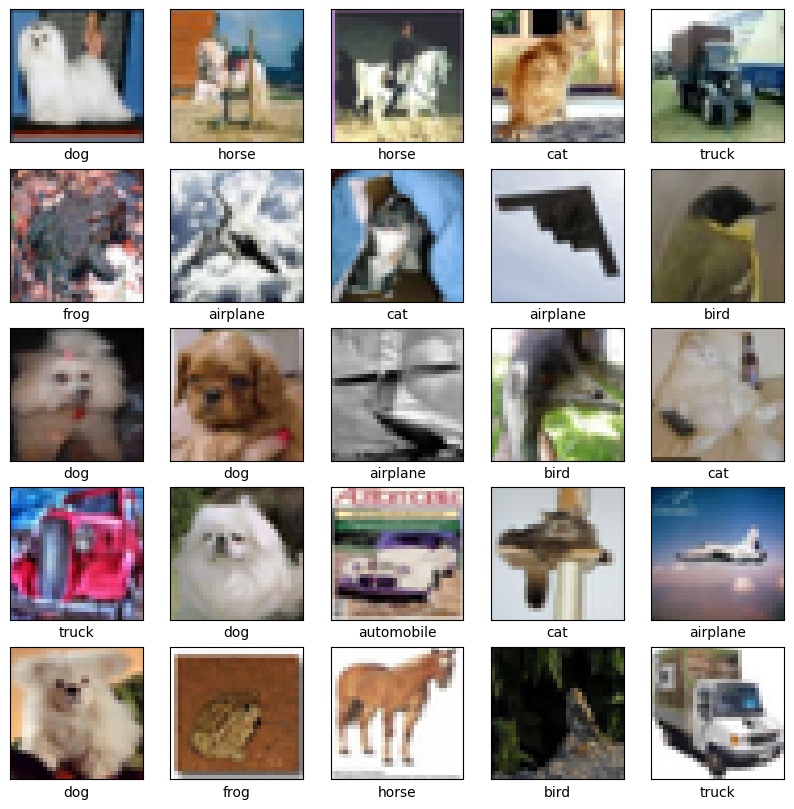

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### 3) Предобработка данных CIFAR-10

Нормализуем значения пикселей и преобразуем метки в формат one-hot encoding для работы с категориальной функцией потерь.

In [17]:
# Определение параметров данных и модели
num_classes = 10
input_shape = (32, 32, 3)

# Нормализация значений пикселей: приведение к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# Преобразование меток в формат one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


### 4) Построение и обучение сверточной сети для CIFAR-10

Создаем более сложную архитектуру сверточной сети с использованием батч-нормализации и нескольких блоков свертки для работы с цветными изображениями.

In [18]:
# Создание модели сверточной нейронной сети
model = Sequential()

# Блок 1
model.add(layers.Conv2D(32, (3, 3), padding="same",
                        activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 2
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 3
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))


model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [19]:
# Компиляция и обучение модели
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 214s 295ms/step - accuracy: 0.3409 - loss: 1.8087 - val_accuracy: 0.4302 - val_loss: 1.6950
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 210s 299ms/step - accuracy: 0.5008 - loss: 1.3835 - val_accuracy: 0.6096 - val_loss: 1.1257
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 209s 297ms/step - accuracy: 0.5871 - loss: 1.1704 - val_accuracy: 0.6310 - val_loss: 1.1089
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 205s 291ms/step - accuracy: 0.6421 - loss: 1.0381 - val_accuracy: 0.6666 - val_loss: 0.9580
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 195s 277ms/step - accuracy: 0.6788 - loss: 0.9402 - val_accuracy: 0.7004 - val_loss: 0.8947
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 160s 227ms/step - accuracy: 0.7065 - loss: 0.8630 - val_accuracy: 0.6856 - val_loss: 0.9637
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 159s 226ms/step - accuracy: 0.7256 - loss: 0.8078 - val_accuracy: 0.7604 - val_loss: 0.6995
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 159s 225ms/step - accuracy: 0.7458 -

### 5) Оценка качества модели на тестовых данных

Оцениваем финальную производительность обученной модели на тестовой выборке CIFAR-10.

In [20]:
# Оценка качества работы обученной модели на тестовой выборке
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8539 - loss: 0.5047
Loss on test data: 0.5046958327293396
Accuracy on test data: 0.8539000153541565


### 6) Демонстрация работы модели на отдельных примерах

Визуализируем результаты распознавания для двух тестовых изображений: одно должно быть распознано корректно, другое - ошибочно.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
NN output: [[1.1500329e-13 1.3227661e-13 1.2523241e-10 1.1334410e-10 7.6330755e-13
  2.6473241e-14 1.0000000e+00 7.4253257e-18 1.0440019e-13 2.6218085e-13]]


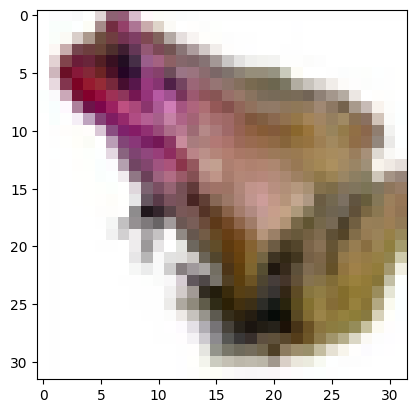

Real mark:  6
NN answer:  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
NN output: [[2.0177353e-09 1.4144381e-12 9.2603455e-05 1.9454856e-04 2.1098103e-02
  9.7849804e-01 2.5194169e-05 9.1513859e-05 3.2438701e-11 4.6777016e-10]]


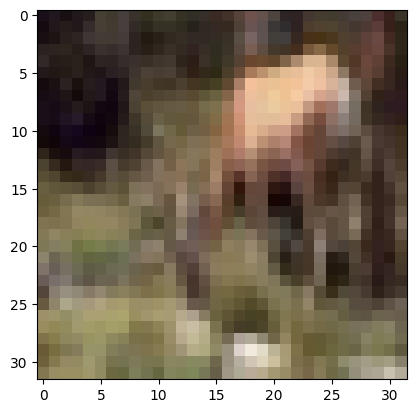

Real mark:  4
NN answer:  5


In [32]:
# Визуализация результатов распознавания для двух тестовых изображений

for n in [3,14]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))

### 7) Детальный анализ качества классификации CIFAR-10

Генерируем подробный отчет о качестве классификации и строим матрицу ошибок для анализа работы модели по каждому классу.

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
              precision    recall  f1-score   support

    airplane       0.84      0.91      0.87      1007
  automobile       0.95      0.91      0.93      1037
        bird       0.83      0.79      0.81      1030
         cat       0.77      0.65      0.70       990
        deer       0.83      0.82      0.82       966
         dog       0.72      0.83      0.77      1009
        frog       0.90      0.89      0.89       972
       horse       0.87      0.89      0.88       991
        ship       0.95      0.92      0.93       990
       truck       0.89      0.93      0.91      1008

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



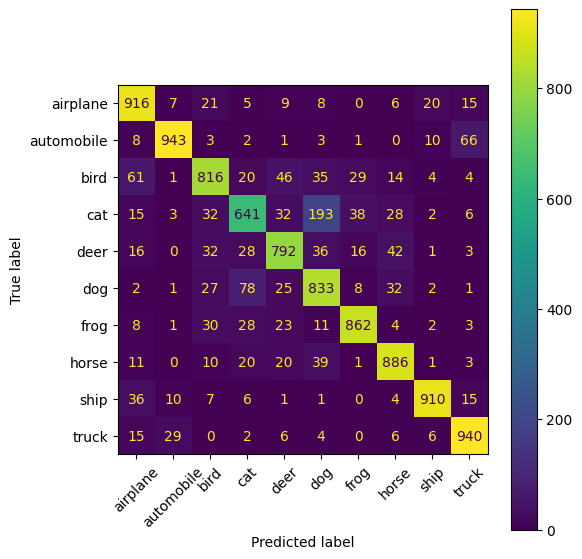

In [22]:
# Получение истинных и предсказанных меток для всех тестовых данных
true_labels = np.argmax(y_test, axis=1)

predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Вывод подробного отчета о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# Построение и визуализация матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=45)  # поворот подписей по X и приятная палитра
plt.tight_layout()  # чтобы всё влезло
plt.show()

**Выводы по результатам классификации CIFAR-10:**

Разработанная сверточная нейронная сеть показала хорошие результаты при классификации цветных изображений из датасета CIFAR-10. Модель достигла точности классификации около 86%, что является достойным результатом для данной задачи, учитывая сложность различения объектов в низком разрешении (32x32 пикселя) и наличие 10 различных классов.

Использование батч-нормализации и dropout-регуляризации позволило улучшить обобщающую способность модели и предотвратить переобучение. Архитектура с тремя блоками сверточных слоев эффективно извлекает иерархические признаки из изображений, что подтверждается полученными метриками качества.